In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,plot_roc_curve,accuracy_score,recall_score
from sklearn.metrics import plot_confusion_matrix

###  Prétraitement de données

In [16]:
data=pd.read_csv('creditcard.csv')


In [4]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 284807 rows and 31 columns


In [6]:
data.dtypes


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<span style="color:red;font-size: 15px " >NB : Pas de valeurs manquantes, pas besoin de coder les données puisque il n'y a pas des attributs catégorielles.</span>.


In [8]:
data.describe().round(2).style.background_gradient()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.860000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.350000,0.000000
std,47488.150000,1.960000,1.650000,1.520000,1.420000,1.380000,1.330000,1.240000,1.190000,1.100000,1.090000,1.020000,1.000000,1.000000,0.960000,0.920000,0.880000,0.850000,0.840000,0.810000,0.770000,0.730000,0.730000,0.620000,0.610000,0.520000,0.480000,0.400000,0.330000,250.120000,0.040000
min,0.000000,-56.410000,-72.720000,-48.330000,-5.680000,-113.740000,-26.160000,-43.560000,-73.220000,-13.430000,-24.590000,-4.800000,-18.680000,-5.790000,-19.210000,-4.500000,-14.130000,-25.160000,-9.500000,-7.210000,-54.500000,-34.830000,-10.930000,-44.810000,-2.840000,-10.300000,-2.600000,-22.570000,-15.430000,0.000000,0.000000
25%,54201.500000,-0.920000,-0.600000,-0.890000,-0.850000,-0.690000,-0.770000,-0.550000,-0.210000,-0.640000,-0.540000,-0.760000,-0.410000,-0.650000,-0.430000,-0.580000,-0.470000,-0.480000,-0.500000,-0.460000,-0.210000,-0.230000,-0.540000,-0.160000,-0.350000,-0.320000,-0.330000,-0.070000,-0.050000,5.600000,0.000000
50%,84692.000000,0.020000,0.070000,0.180000,-0.020000,-0.050000,-0.270000,0.040000,0.020000,-0.050000,-0.090000,-0.030000,0.140000,-0.010000,0.050000,0.050000,0.070000,-0.070000,-0.000000,0.000000,-0.060000,-0.030000,0.010000,-0.010000,0.040000,0.020000,-0.050000,0.000000,0.010000,22.000000,0.000000
75%,139320.500000,1.320000,0.800000,1.030000,0.740000,0.610000,0.400000,0.570000,0.330000,0.600000,0.450000,0.740000,0.620000,0.660000,0.490000,0.650000,0.520000,0.400000,0.500000,0.460000,0.130000,0.190000,0.530000,0.150000,0.440000,0.350000,0.240000,0.090000,0.080000,77.160000,0.000000
max,172792.000000,2.450000,22.060000,9.380000,16.880000,34.800000,73.300000,120.590000,20.010000,15.590000,23.750000,12.020000,7.850000,7.130000,10.530000,8.880000,17.320000,9.250000,5.040000,5.590000,39.420000,27.200000,10.500000,22.530000,4.580000,7.520000,3.520000,31.610000,33.850000,25691.160000,1.000000


In [9]:
data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<span style="color:blue;font-size: 15px " >=> pas de variables nulles</span>.


In [10]:
data.duplicated().sum()


1081

<span style="color:blue;font-size: 15px " >il ya beaucoup de valeurs dupliqués , donc il faut les supprimer.</span>.


In [11]:
data = data.drop_duplicates()


In [12]:
data.duplicated().sum()


0

<AxesSubplot:xlabel='Class', ylabel='count'>

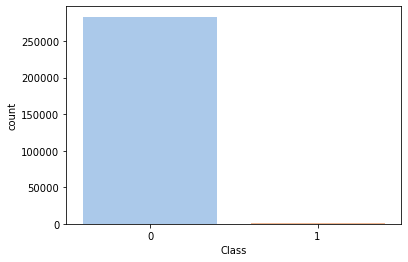

In [13]:
sns.countplot(x='Class',data=data,palette="pastel")


In [18]:
lis=["Not Fraud","Frauds"]
fraud_or_not = data["Class"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]
fig = px.pie(values=data['Class'].value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="pourcentage entre les transactions de Frauds & Non-Frauds")
fig.show()

<span style="color:blue;font-size: 15px " >les données sont inéquilibrés , il faut les traiter</span>.


<AxesSubplot:>

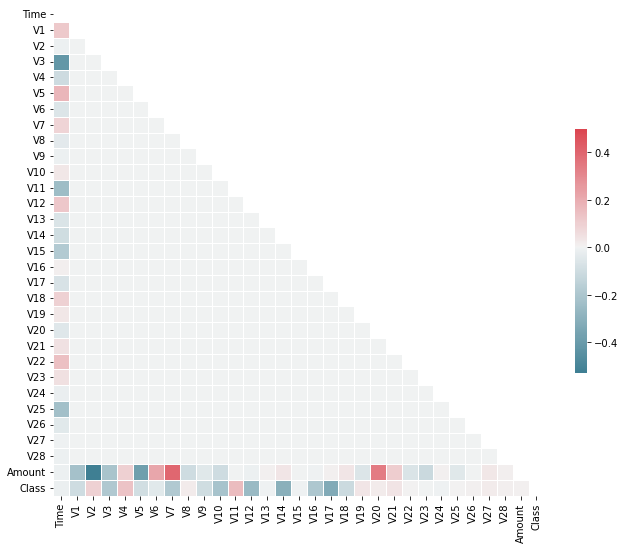

In [19]:
corr=data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #to generate a down triangle mask 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
corr["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

<span style="color:blue;font-size: 15px " >Les 3 principales variables indépendantes {V17, V14, V12} qui devraient contenir des informations importantes sur le caractère frauduleux ou non d'une transaction par carte de crédit.</span>.


<span style="color:green;font-size: 15px " >Affichage la densité de chaque instance de classe(Normal, Fraud) par rapport aux attributs V17,V14,V12 </span>.


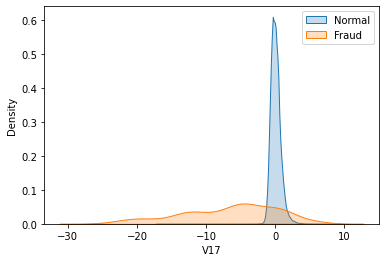

In [21]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data[data['Class'] == 0]['V17'], label="Normal", shade=True)
sns.kdeplot(data=data[data['Class'] == 1]['V17'], label="Fraud", shade=True)
plt.legend()
plt.show()

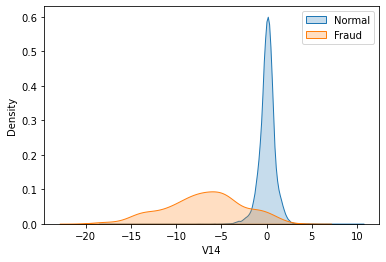

In [22]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data[data['Class'] == 0]['V14'], label="Normal", shade=True)
sns.kdeplot(data=data[data['Class'] == 1]['V14'], label="Fraud", shade=True)
plt.legend()
plt.show()

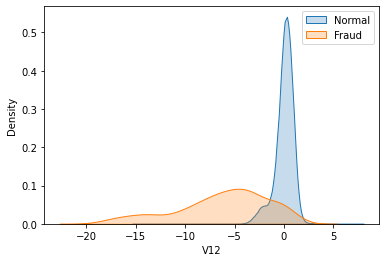

In [23]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data[data['Class'] == 0]['V12'], label="Normal", shade=True)
sns.kdeplot(data=data[data['Class'] == 1]['V12'], label="Fraud", shade=True)
plt.legend()
plt.show()

<span style="color:blue;font-size: 15px " >Comme la plupart des caractéristiques sont dans PCA, à l exception du temps et du montant, nous devrons examiner de plus près ces deux attributs.</span>.


<span style="color:green;font-size: 15px " >Projection de la densité de Amount et Time .</span>.

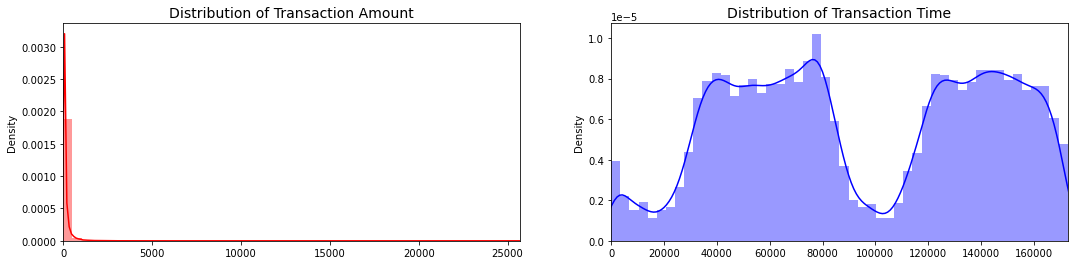

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

Val_Amount = data['Amount'].values
Val_Time = data['Time'].values

sns.distplot(Val_Amount, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(Val_Amount), max(Val_Amount)])

sns.distplot(Val_Time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(Val_Time), max(Val_Time)])

plt.show()

<span style="color:blue;font-size: 15px " >Comme les attributs "Amount" et "Time" ne sont pas dans la même échelle que les autres attributs, nous devons appliquer le Scaler sur ces attributs et supprimer les attributs originales.</span>.

In [29]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]

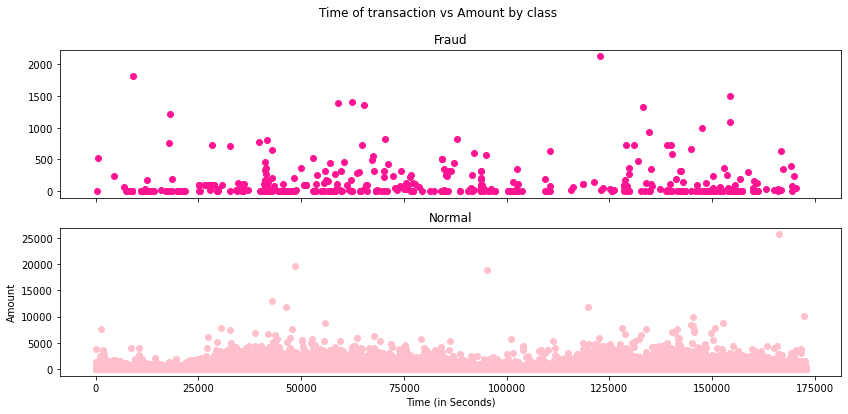

In [30]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 6
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount,color = 'deeppink')
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount,color = 'pink')
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<span style="color:blue;font-size: 15px " >Comme nous pouvons le constater, la distribution des transactions authentiques(normale) est plus importante que celle des transactions frauduleuses, ce qui est logique puisque l'ensemble de données de sortie contient plus de données authentiques 99,8</span>.

Text(0.5, 1.0, 'Temps de transaction pour les utilisateurs normales ')

<Figure size 576x288 with 0 Axes>

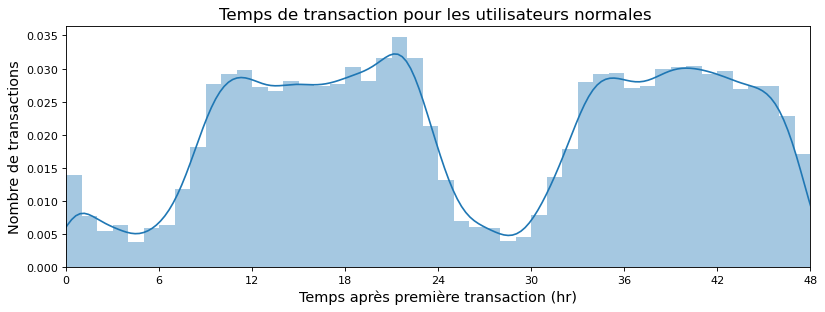

In [34]:
plt.figure(figsize=(8,4))
Nofraud_data = data [data['Class']==0]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Nofraud_data [ 'Time']/60/60, bins=48)
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Temps après première transaction (hr)',fontsize=13)
plt.ylabel('Nombre de transactions',fontsize=13)
plt.title('Temps de transaction pour les utilisateurs normales ',fontsize=15)

Text(0.5, 1.0, 'Temps de transaction pour les utilisateurs fraduleux ')

<Figure size 576x288 with 0 Axes>

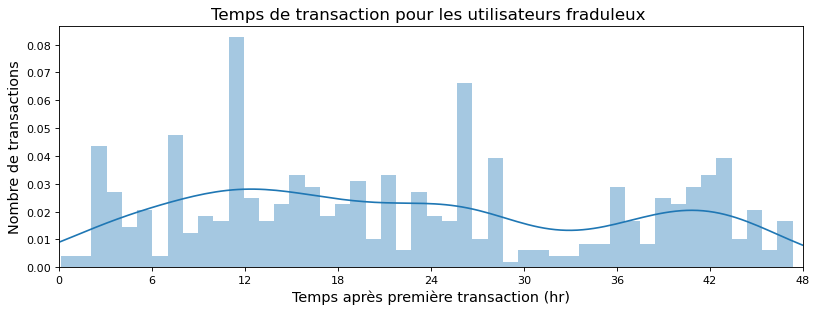

In [36]:
plt.figure(figsize=(8,4))
Fraud_data = data [data['Class']==1]
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(Fraud_data[ 'Time']/60/60, bins=48)
plt.xticks(np.arange(0,54,6))
plt.xlim([0,48])
plt.xlabel('Temps après première transaction (hr)',fontsize=13)
plt.ylabel('Nombre de transactions',fontsize=13)
plt.title('Temps de transaction pour les utilisateurs fraduleux ',fontsize=15)

<span style="color:blue;font-size: 15px " >Comme vous constatez, le nombre de transactions pour les utilisateurs authentiques(normale) diminue en fin de soirée et tôt le matin. C'est logique puisque la plupart des gens dorment pendant cette période.</br> 
    Au contraire, pour les transactions frauduleuses, le nombre de transactions connaît des pics importants pendant les heures tardives, et pendant la journée, le nombre de transactions est nettement inférieur.</span>.

<AxesSubplot:xlabel='Amount'>

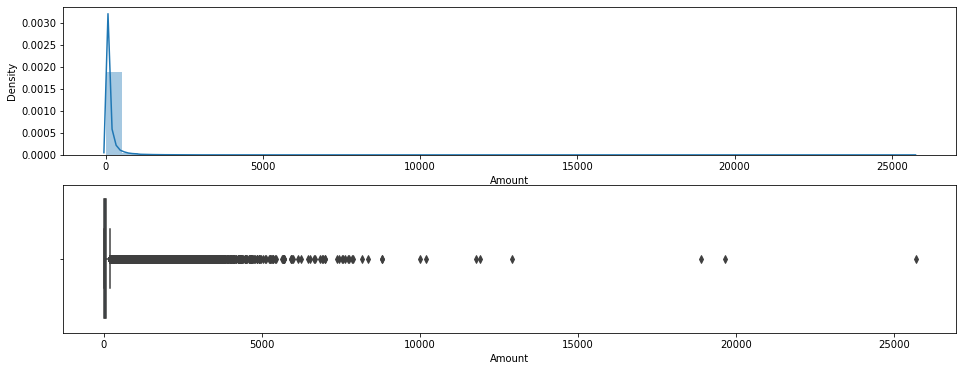

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,6))
sns.distplot(data.Amount, ax=ax1) 
sns.boxplot(data.Amount, ax=ax2)

<span style="color:blue;font-size: 15px " >Après avoir effectué l'analyse IQR, nous remarquons que nous pourrions perdre certaines données d'utilisateurs frauduleux. Mais comme les données sont très peu nombreuses pour ces utilisateurs, il n'est pas recommandé de les supprimer. Au lieu de cela, nous éliminons tous les points de données qui sont au-delà de 8500 points afin de supprimer les valeurs aberrantes extrêmes et, en même temps, de ne pas perdre de données sur les utilisateurs frauduleux</span>.

<span style="color:green;font-size: 15px " > affichage de nombre de ligne par classe ayant Amount supérieure à la limite supérieure</span>.

In [39]:
from scipy.stats import iqr

upper_limit = data.Amount.quantile(0.75) + (1.5*iqr(data.Amount))
print(upper_limit)
print(data[data.Amount>upper_limit]['Class'].value_counts())

184.5125
0    31813
1       91
Name: Class, dtype: int64


In [41]:
data = data [data.Amount<=8500]

print(data['Class'].value_counts())
print('\nPourcentage d activité fraduleuse: {:.2%}'.format((data [data['Class'] == 1].shape[0] / data.shape[0])))

0    284305
1       492
Name: Class, dtype: int64

Pourcentage d activité fraduleuse: 0.17%


<span style="color:red;font-size: 15px " >Puisque l attribut "Amount" n'est pas dans la même échelle que les autres attributs, nous devons appliquer le <b>Scaler</b> sur cet attribut et supprimer l attribut original.</span>.

In [42]:
from sklearn.preprocessing import StandardScaler


In [43]:
std_scaler = StandardScaler()
data['Scaled_Amount']=std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [44]:
data.drop(['Amount','Time'],axis=1,inplace=True)
# drop the old feature in addition to the "time" feature 

In [45]:
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.263588
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.363560
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.241209
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.152098
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.076301


In [46]:
data.describe().round(2).style.background_gradient()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Amount
count,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000,284797.000000
mean,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
std,1.950000,1.630000,1.510000,1.410000,1.360000,1.320000,1.210000,1.190000,1.100000,1.090000,1.020000,1.000000,1.000000,0.960000,0.920000,0.880000,0.850000,0.840000,0.810000,0.750000,0.730000,0.720000,0.620000,0.610000,0.520000,0.480000,0.400000,0.330000,0.040000,1.000000
min,-56.410000,-72.720000,-33.680000,-5.680000,-42.150000,-26.160000,-43.560000,-73.220000,-13.430000,-24.590000,-4.800000,-18.680000,-5.790000,-19.210000,-4.500000,-14.130000,-25.160000,-9.500000,-4.930000,-28.010000,-34.830000,-8.890000,-44.810000,-2.840000,-10.300000,-2.070000,-22.570000,-11.710000,0.000000,-0.380000
25%,-0.920000,-0.600000,-0.890000,-0.850000,-0.690000,-0.770000,-0.550000,-0.210000,-0.640000,-0.540000,-0.760000,-0.410000,-0.650000,-0.430000,-0.580000,-0.470000,-0.480000,-0.500000,-0.460000,-0.210000,-0.230000,-0.540000,-0.160000,-0.350000,-0.320000,-0.330000,-0.070000,-0.050000,0.000000,-0.350000
50%,0.020000,0.070000,0.180000,-0.020000,-0.050000,-0.270000,0.040000,0.020000,-0.050000,-0.090000,-0.030000,0.140000,-0.010000,0.050000,0.050000,0.070000,-0.070000,-0.000000,0.000000,-0.060000,-0.030000,0.010000,-0.010000,0.040000,0.020000,-0.050000,0.000000,0.010000,0.000000,-0.280000
75%,1.320000,0.800000,1.030000,0.740000,0.610000,0.400000,0.570000,0.330000,0.600000,0.450000,0.740000,0.620000,0.660000,0.490000,0.650000,0.520000,0.400000,0.500000,0.460000,0.130000,0.190000,0.530000,0.150000,0.440000,0.350000,0.240000,0.090000,0.080000,0.000000,-0.050000
max,2.450000,22.060000,9.380000,16.490000,34.800000,22.530000,36.880000,20.010000,15.590000,23.750000,12.020000,7.850000,4.570000,10.530000,5.830000,8.290000,9.250000,4.300000,5.590000,23.640000,27.200000,10.500000,22.530000,4.020000,7.520000,3.520000,11.140000,33.850000,1.000000,35.310000


### Equilibrer les données

In [51]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [54]:
from sklearn.model_selection import train_test_split


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
classifier=GaussianNB()
classifier.fit(X_train , y_train)

TypeError: _validate_data() missing 1 required positional argument: 'X'

In [ ]:
classifier.score(X_train , y_train).round(5)